In [15]:
import os
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

In [2]:
%matplotlib notebook

In [16]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
os.listdir(working_dir)

['Lancaster_d60',
 'cyto_profiles_combined.npy',
 'analysis.csv',
 'cyto_profiles_combined_samples.npy',
 'cyto_arlotta_umap.pdf',
 'Arlotta_d56']

In [17]:
df = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
df

,type
path,
20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40,Arlotta_d56
20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40,Arlotta_d56
20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40,Arlotta_d56
20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40,Arlotta_d56
20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40,Arlotta_d56
20190723_12_09_45_ef26_org6_488LP14_561LP140_642LP40,Arlotta_d56
20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP50,Lancaster_d60
20190531_14_31_36_AA_fatty2_488LP13_561LP140_642LP60,Lancaster_d60
20190531_15_00_56_AA_fatty3_488LP13_561LP120_642LP50,Lancaster_d60


In [4]:
profiles = np.load(os.path.join(working_dir, 'cyto_profiles_combined.npy'))
profiles.shape

(70000, 3, 6)

In [5]:
features = profiles.reshape((len(profiles), -1))

Optional scaling and preprocessing (Skip)

In [83]:
means = profiles.mean(axis=0).mean(axis=-1) * np.ones((profiles.shape[-1], 3))
scaled_profiles = profiles / means.T
scaled_profiles.shape

(55000, 3, 6)

In [60]:
from sklearn.preprocessing import scale

In [64]:
scaled_features = scale(features)

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Flattened profiles seem best here...

In [6]:
np.random.seed(7)
model = UMAP(metric='euclidean', n_neighbors=15).fit(features)
x_umap = model.transform(features)
x_umap.shape

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py (457)

File "../../.conda/envs/scout/lib/python3.6/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee type: recursive(type(CPUDispatcher(<function make

(70000, 2)

<IPython.core.display.Javascript object>


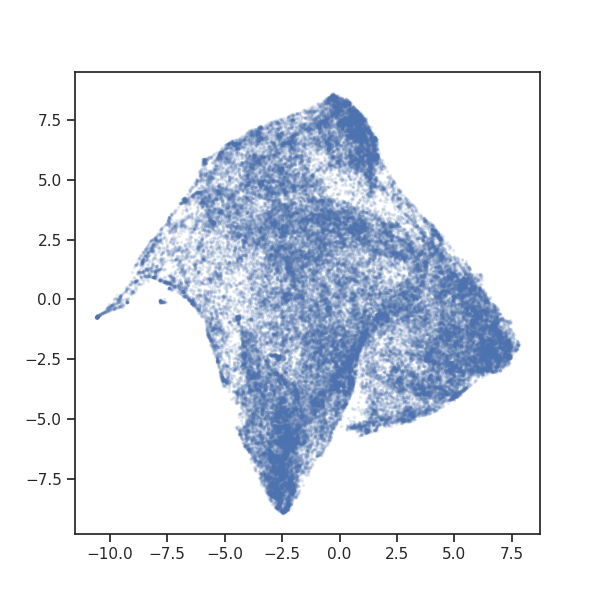

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(x_umap[:, 0], x_umap[:, 1], '.', alpha=0.1, markersize=3)
# plt.xlim([-10, 10])
plt.show()

Filter bad profiles

In [8]:
good_idx = np.where(x_umap[:, 0] < 10)
x_umap = x_umap[good_idx]
features = features[good_idx]

In [9]:
profiles = profiles[good_idx]

<IPython.core.display.Javascript object>


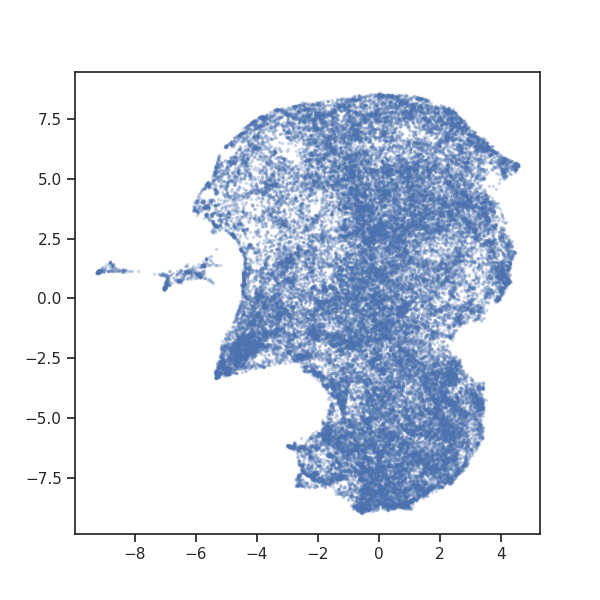

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(x_umap[:, 0], x_umap[:, 1], '.', alpha=0.2, markersize=3)
plt.show()

Agglomerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [166]:
clustering = AgglomerativeClustering(n_clusters=6, linkage='average').fit(x_umap)
labels = clustering.labels_

class_labels = np.unique(labels)
class_labels

array([0, 1, 2, 3, 4, 5])

<IPython.core.display.Javascript object>


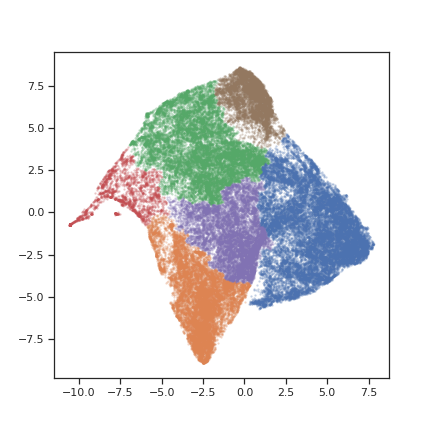

In [167]:
plt.figure(figsize=(6, 6))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.2, markersize=3)
# plt.xlim([-8, 8])
plt.show()

Show organoid labels

In [11]:
sample_labels = np.load(os.path.join(working_dir, 'cyto_profiles_combined_samples.npy')).astype(np.int)
np.unique(sample_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [ ]:
sample_labels = sample_labels[good_idx]

In [144]:
cluster_names = ['Adjacent',
                 'DN',
                 'TBR1-LowDN',
                 'Surface',
                 'TBR1-HighDN',
                 'TBR1-rich']

In [ ]:
group1 = list(range(6))
group2 = list(range(6, 14))

plt.figure(figsize=(8, 8))
for i in range(0, class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.8, markersize=4, label=f'{cluster_names[i]}', markeredgewidth=0)
plt.ylim([-10, 10])
plt.axis('equal')
plt.legend()
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(os.path.join(working_dir, 'cyto_clusters_umap.pdf'), bbox_inches='tight')
plt.show()

# 10, 8, 7, 6 in purple cluster
    
plt.figure(figsize=(4, 4))
for i in np.unique(sample_labels):
    idx = np.where(sample_labels == i)[0]
#     plt.plot(x_umap[idx, 0], x_umap[idx, 1], '.', alpha=0.1, markersize=3, label=f'Sample {i}')
    if i in group2:
        plt.plot(x_umap[idx, 0], x_umap[idx, 1], 'r.', alpha=0.5, markersize=2, markeredgewidth=0)
    elif i in group1:
        plt.plot(x_umap[idx, 0], x_umap[idx, 1], 'b.', alpha=0.5, markersize=2, markeredgewidth=0)
plt.ylim([-10, 10])
plt.axis('equal')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Red = Lan. d60, Blue = Arl. d56')
plt.savefig(os.path.join(working_dir, 'cyto_arlotta_umap.pdf'), bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>

Inpsect profiles interactively

In [20]:
from sklearn.neighbors import NearestNeighbors

In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

<IPython.core.display.Javascript object>


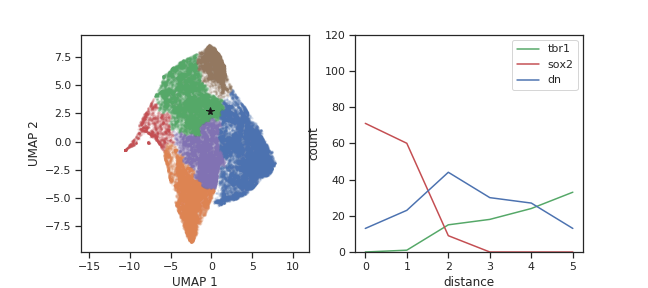

interactive(children=(FloatSlider(value=0.0, description='x', max=12.0, min=-16.0, step=0.05), FloatSlider(val…

In [155]:
%matplotlib notebook

x = -6
y = 4

min_val = -16
max_val = 12

embedding = x_umap

fig = plt.figure(figsize=(9, 4))

ax0 = plt.subplot(121)
for i in range(class_labels.max() + 1):
    idx = np.where(labels == i)[0]
    plt.plot(embedding[idx, 0], embedding[idx, 1], '.', markersize=3, alpha=0.1)
line, = plt.plot(x, y, 'k*', markersize=8)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim([min_val, max_val])

ax1 = plt.subplot(122)
ax1.set_ylim([0, 120])

nbrs = NearestNeighbors(1).fit(embedding)
dist, idx = nbrs.kneighbors(np.asarray([[x, y]]))
profile = profiles[idx][0, 0]

names = ['tbr1', 'sox2', 'dn']
colors = ['g', 'r', 'b']
line_profiles = []
for i, p in enumerate(profile):
    line_profile, = plt.plot(p, label=names[i], color=colors[i])
    line_profiles.append(line_profile)
plt.xlabel('distance')
plt.ylabel('count')
plt.legend(loc=1)
    
def update(x=0.0, y=0.0):
    line.set_xdata([x])
    line.set_ydata([y])
    
    _, idx = nbrs.kneighbors(np.asarray([[x, y]]))
    profile = profiles[idx][0, 0]
    for line_profile, p in zip(line_profiles, profile):
        line_profile.set_ydata(p)
    ax1.autoscale_view(None, False, True)
    fig.canvas.draw_idle()
    
interact(update, 
         x=widgets.FloatSlider(min=min_val, max=max_val, step=0.05),
         y=widgets.FloatSlider(min=min_val, max=max_val, step=0.05))

plt.show()

Show sample of profiles from each cluster

<IPython.core.display.Javascript object>


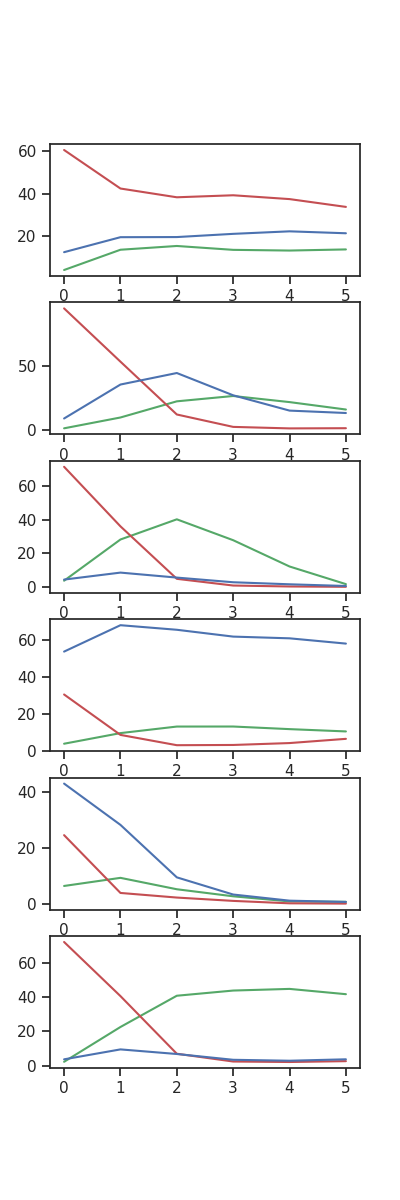

In [25]:
colors = ['g', 'r', 'b']
plt.figure(figsize=(4, 12))
for i in np.unique(class_labels):
    idx = np.where(labels == i)[0]
    profile_cluster = profiles[idx]
    average_profile = profile_cluster.mean(axis=0)
    
    plt.subplot(class_labels[-1] + 1, 1, i+1)
    for p, c in zip(average_profile, colors):
        plt.plot(p, color=c)
#     plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


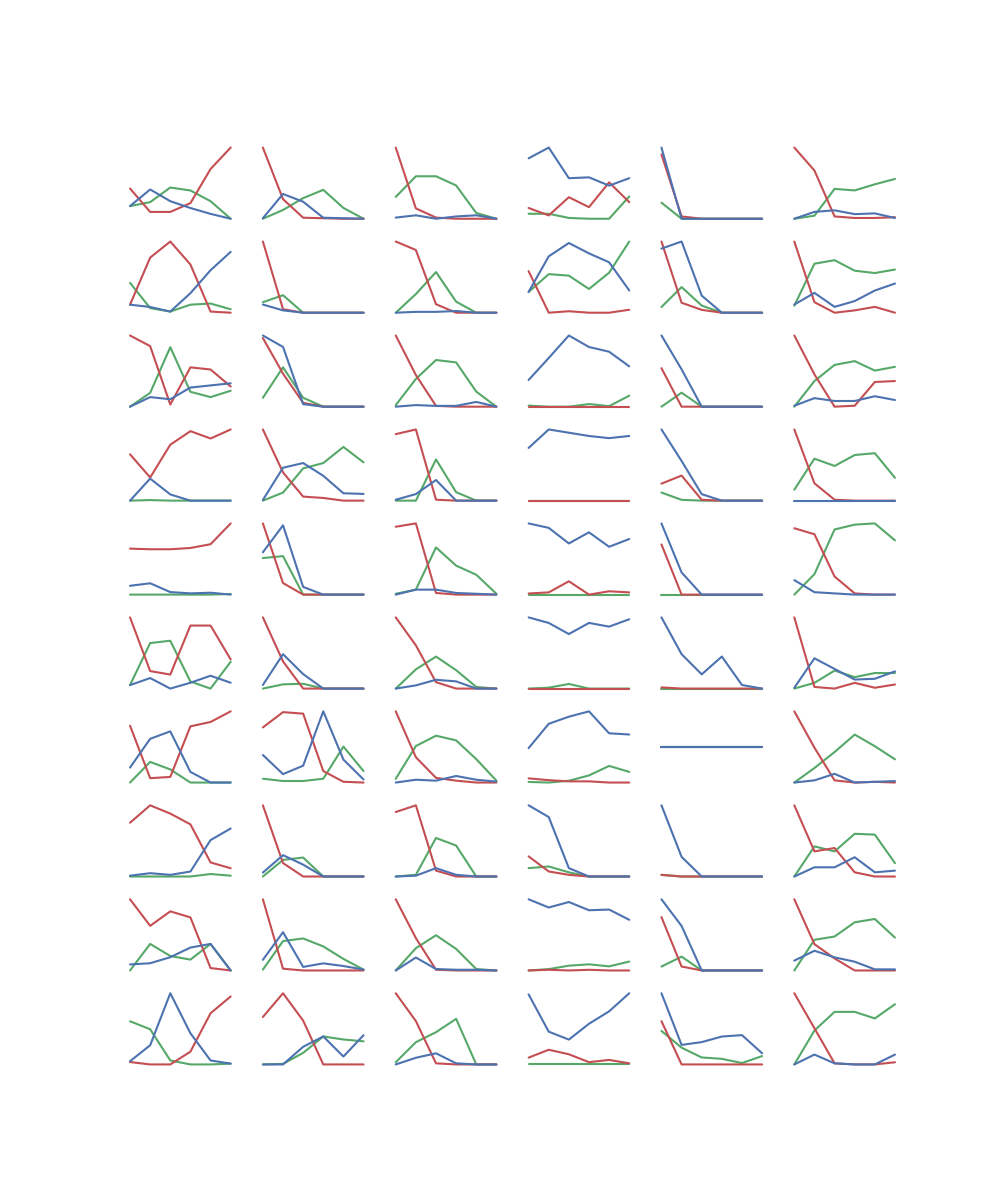

In [26]:
n_profiles = 10

plt.figure(figsize=(10, 12))
for i in np.unique(class_labels):
    idx = np.where(labels == i)[0]
    profile_cluster = profiles[idx]
    
    np.random.shuffle(profile_cluster)
    sample = profile_cluster[:n_profiles]
    
    for j, s in enumerate(sample):
        subplot_idx = len(class_labels) * j + i + 1
        plt.subplot(n_profiles, class_labels[-1] + 1, subplot_idx)
        for p, c in zip(s, colors):
            plt.plot(p, color=c)
            plt.axis('off')
plt.show()

- Euclidean distance metric, 6 clusters on UMAP looks good
- Correlation distance metric, 5 clusters may look better

Build Seaborn Lineplots

In [27]:
import pandas as pd
import seaborn as sns

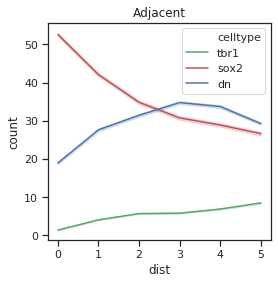

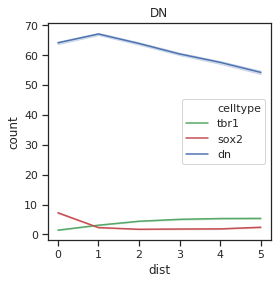

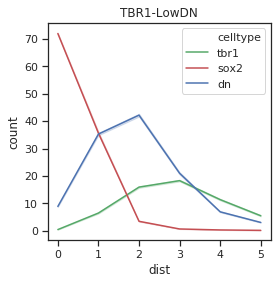

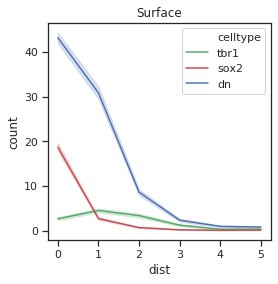

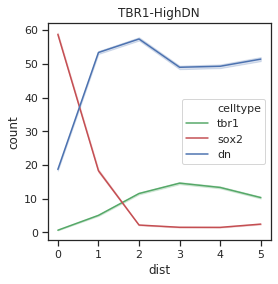

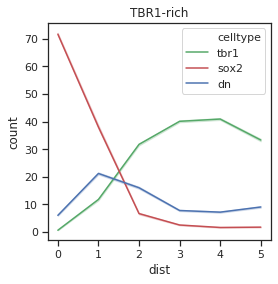

In [62]:
%matplotlib inline

cluster_names = ['Adjacent',
                 'DN',
                 'TBR1-LowDN',
                 'Surface',
                 'TBR1-HighDN',
                 'TBR1-rich']

celltype_names = ['tbr1', 'sox2', 'dn']

for cluster_to_plot in range(len(cluster_names)):
    
    dist = []
    count = []
    celltype = []
    cluster = []
    
    for i, profile in enumerate(profiles):
        for k, p in enumerate(profile):
            for b, c in enumerate(p):
                cluster_name = cluster_names[labels[i]]
                if cluster_name == cluster_names[cluster_to_plot]:
                    dist.append(b)
                    count.append(c)
                    cluster.append(cluster_name)
                    celltype.append(celltype_names[k])
                    
    df = pd.DataFrame({'dist': dist, 
                       'count': count, 
                       'celltype': celltype})
    
    # Plot this cluster average profile
    plt.figure(figsize=(4, 4))
    sns.lineplot(x="dist", y="count",
             hue="celltype", ci=99, palette=['g', 'r', 'b'],
             data=df)
    plt.title(cluster_names[cluster_to_plot])
    plt.savefig(os.path.join(working_dir, f'average_profile_{cluster_names[cluster_to_plot]}.pdf'),
                bbox_inches='tight')
    plt.show()

Save the cluster labels

In [30]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [31]:
np.save(os.path.join(working_dir, 'cyto_labels_combined.npy'), labels)

Save the UMAP embedding

In [32]:
import joblib

filename = 'model_arlotta.umap'
joblib.dump(model, os.path.join(working_dir, filename))

['/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/model_arlotta.umap']

Extract ROIs around cluster exemplar vertices

In [33]:
from scout import io
from scout.cyto import load_mesh
from scout.utils import read_voxel_size, extract_box

In [41]:
arlotta_working_dir = os.path.abspath(os.path.join(working_dir, 'Arlotta_d56'))
arlotta_folders = list(filter(lambda x: x.startswith('2019'), os.listdir(arlotta_working_dir)))
arlotta_folders.sort()

d60_working_dir = os.path.abspath(os.path.join(working_dir, 'Lancaster_d60'))
d60_folders = list(filter(lambda x: x.startswith('2019'), os.listdir(d60_working_dir)))
d60_folders.sort()

arlotta_dirs = [os.path.join(arlotta_working_dir, f, 'dataset') for f in arlotta_folders]
d60_dirs = [os.path.join(d60_working_dir, f, 'dataset') for f in d60_folders]
org_dirs = arlotta_dirs + d60_dirs
org_dirs

['/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190723_12_09_45_ef26_org6_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Lancaster_d60/20190509_16_55_31_AA-orgs5.8.19_org1_488LP15_561LP140_642LP5

In [42]:
cluster_idxs = [np.where(labels == lbl)[0] for lbl in np.unique(labels)]
cluster_centroids = np.asarray([x_umap[idx].mean(axis=0) for idx in cluster_idxs])
cluster_centroids

array([[ 4.0473166, -1.0614697],
       [-2.752202 , -5.010932 ],
       [-2.6196594,  3.7995353],
       [-7.3217745,  1.0616199],
       [-0.7309528, -1.3324287],
       [ 0.3410264,  6.731799 ]], dtype=float32)

In [141]:
_, idx = nbrs.kneighbors(cluster_centroids, n_neighbors=10)
neighbor_idx = np.array([2, 4, 7, 9, 4, 7])
example_idx = idx[np.arange(len(cluster_centroids)), neighbor_idx]
example_idx

array([ 3705, 23416, 50910, 14037, 53496, 17806])

In [142]:
org_idxs = sample_labels[example_idx]
example_dirs = [org_dirs[p] for p in org_idxs]
example_dirs

['/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Lancaster_d60/20190531_17_03_00_AA_fatty4_488LP13_561LP100_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Lancaster_d60/20190531_17_03_00_AA_fatty4_488LP13_561LP100_642LP50/dataset',
 '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/Arlotta_d56/20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40/dataset']

ROI center: [ 264 3287 2465]
[-0.41848847  0.8209532  -0.3884627 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


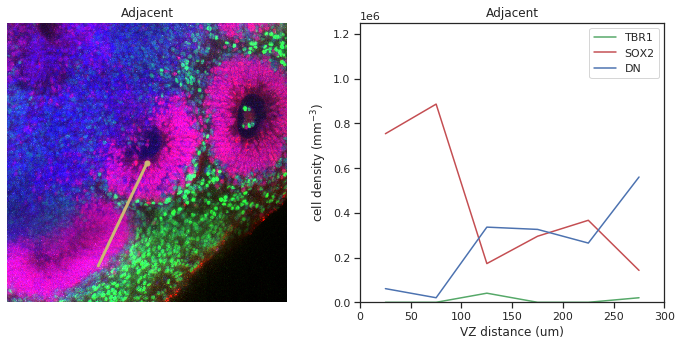

ROI center: [ 315  842 2304]
[ 0.24237242  0.9467354  -0.21200877]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


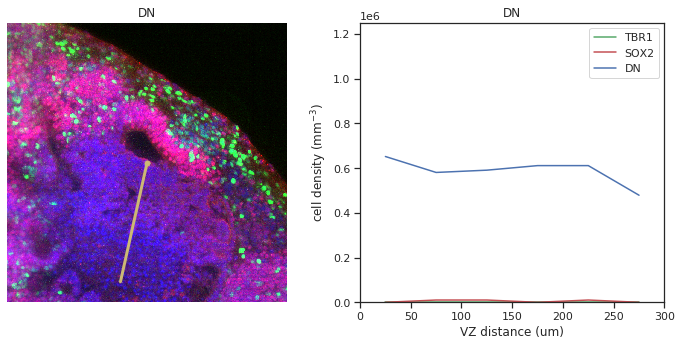

ROI center: [ 255 4356 2202]
[ 0.15876223  0.5929071  -0.7894655 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


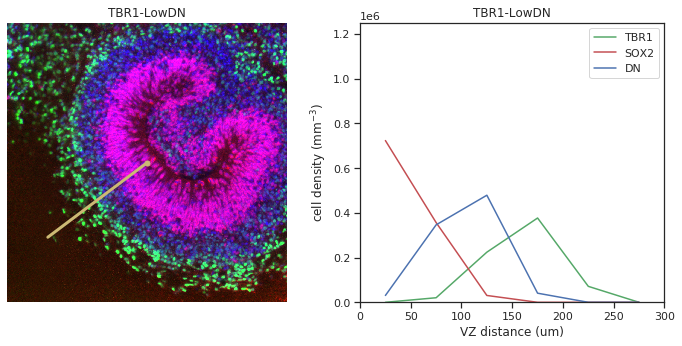

ROI center: [  78 2483 3138]
[-0.13157246  0.13030843 -0.98270464]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


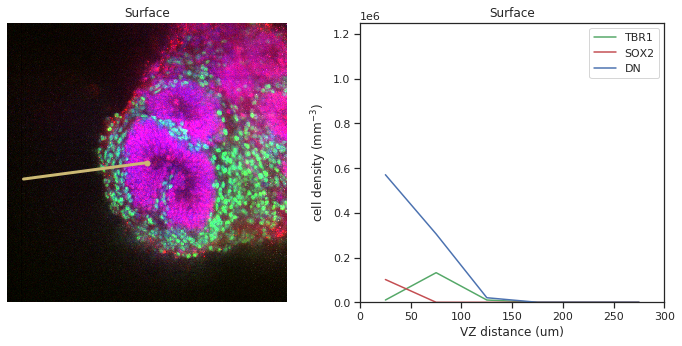

ROI center: [ 531 1475 2010]
[0.2788046  0.49891472 0.8205803 ]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


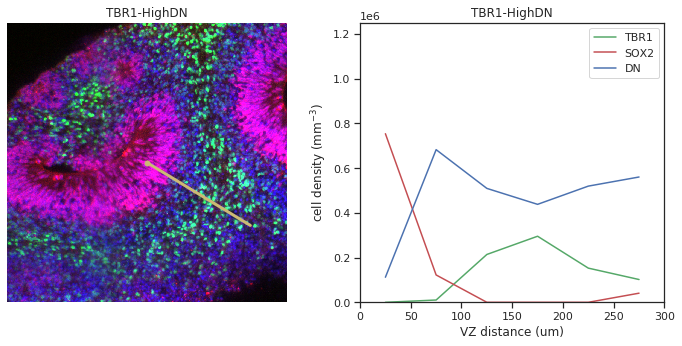

ROI center: [ 558 2790 1660]
[ 0.30907312  0.03127684 -0.95052385]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


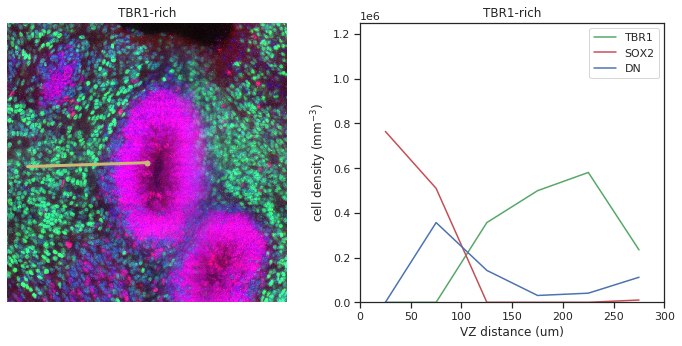

In [143]:
width = 1024
# depth = 1

org_dir = example_dirs[0]

for k, org_dir in enumerate(example_dirs):
    # Get the ROI center coordinates
    combined_sample_idx = np.where(sample_labels == org_idxs[k])[0]
    example_sample_idx = np.where(combined_sample_idx == example_idx[k])[0]
    cyto_sample_idx = np.load(os.path.join(org_dir, 'cyto_sample_index.npy'))
    example_vertex_idx = cyto_sample_idx[example_sample_idx][0]
    mesh = load_mesh(os.path.join(org_dir, 'mesh_ventricles.pkl'))
    normal = mesh['normals'][example_vertex_idx]
    example_vertex_um = mesh['verts'][example_vertex_idx]
    voxel_size = np.asarray(read_voxel_size(os.path.join(org_dir, 'voxel_size.csv')))
    example_coord = (example_vertex_um / voxel_size).astype(np.int)
    print(f'ROI center: {example_coord}')
    print(normal)

    # Extract ROI
    syto = io.open(os.path.join(org_dir, 'syto.zarr'))
    sox2 = io.open(os.path.join(org_dir, 'sox2.zarr'))
    tbr1 = io.open(os.path.join(org_dir, 'tbr1.zarr'))
    start = np.array([example_coord[0], example_coord[1] - width // 2, example_coord[2] - width // 2])
    stop = np.array([example_coord[0] + 1, example_coord[1] + width // 2, example_coord[2] + width // 2])
    syto_roi = extract_box(syto, start, stop)[0]
    sox2_roi = extract_box(sox2, start, stop)[0]
    tbr1_roi = extract_box(tbr1, start, stop)[0]
    
    # Get Profile for normal
    example_profile = profiles[example_idx[k]]
    syto_profile = example_profile

    # Plot the ROIs
    plt.figure(figsize=(12, 36))
    
    plt.subplot(len(example_dirs), 2, 2*k+1)
    plt.imshow(np.dstack([sox2_roi / max(np.percentile(sox2_roi, 99), 0.02), 
                          tbr1_roi / max(np.percentile(tbr1_roi, 99), 0.02), 
                          syto_roi / max(np.percentile(syto_roi, 99), 0.02)]))
    plt.plot([width // 2, normal[2] * 300/voxel_size[2] + width // 2], 
             [width // 2, normal[1] * 300/voxel_size[1] + width // 2], 
             'y-', linewidth=3)
    plt.plot([width // 2], [width // 2], 'y.', markersize=10)
    plt.axis('off')
    plt.title(f'{cluster_names[k]}')
    
    plt.subplot(len(example_dirs), 2, 2*k+2)
    example_profile = profiles[example_idx[k]]
    bin_volume = (50/1000) * (np.pi * (25/1000)**2)  # mm3
    x = np.arange(25, 325, 50)
    plt.plot(x, example_profile[0] / bin_volume, 'g-', label='TBR1')
    plt.plot(x, example_profile[1] / bin_volume, 'r-', label='SOX2')
    plt.plot(x, example_profile[2] / bin_volume, 'b-', label='DN')
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.title(f'{cluster_names[k]}')
    plt.xlabel('VZ distance (um)')
    plt.ylabel('cell density (mm$^{-3}$)')
    plt.xlim([0, 300])
    plt.ylim([0, 1_250_000])
    plt.legend()
    
    plt.savefig(os.path.join(working_dir, f'example_roi_{cluster_names[k]}.pdf'), bbox_inches='tight')
    plt.show()